In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw

In [15]:
kappa = 1.*10**21
energy = 10**15
nr_steps = 10**4
sim = rw.IsotropicSimulation(nr_particles = 10**3, energy = energy, step_size = 3*10**12, nr_steps = nr_steps, diffusion_coefficient_para = kappa, nr_obs_steps = 600)
%time sim.simulate()

simulate with a diffusion coefficient of  1e+21 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file isotropic.pkl
CPU times: user 20 s, sys: 108 ms, total: 20.1 s
Wall time: 20.3 s


init statistics plotting class


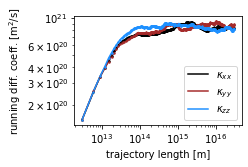

diffusion coefficients computed between 6.55e+15m and 3.00e+16m with 100 data points
kappa_{xx}: 8.31e+20 m²/s +- 1.45e+19 m²/s
kappa_{yy}: 8.86e+20 m²/s +- 2.73e+19 m²/s
kappa_{zz}: 8.11e+20 m²/s +- 1.87e+19 m²/s


In [16]:
df = pd.read_pickle("isotropic.pkl")
sta = rw.Statistics(df)
df_kappas = sta.plot_diffusion_coefficients(n_points_plateau=100)

#### Spherical source with spherical observer

In [4]:
def simulate(file_name, step_size_diff_factor, bins_log, bins_lin, d_max):
    sim = rw.PlasmoidSimulation(nr_particles = 10**4, radius = 10**14, energy = energy, nr_steps = nr_steps, diffusion_coefficient = kappa, step_size = 1*10**11, step_size_diff_factor = step_size_diff_factor)
    %time sim.simulate(file_name)
    sim.plot_arrival_times(bins_log=bins_log, bins_lin=bins_lin, d_max=d_max)
    print('finished: ', file_name)

mean-free paths:  [1.e+12 1.e+12 1.e+12] m
simulate with a diffusion coefficient of  1e+20 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file data/tut_7_1.pkl
CPU times: user 2min 17s, sys: 67.2 ms, total: 2min 17s
Wall time: 2min 18s
init statistics plotting class
9.99460431724544


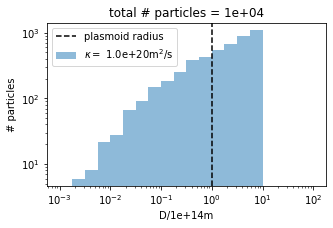

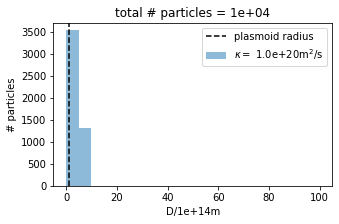

finished:  data/tut_7_1


In [5]:
simulate('data/tut_7_1', 1.0, 20, 40, 100)

mean-free paths:  [1.e+12 1.e+12 1.e+12] m
simulate with a diffusion coefficient of  1e+20 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file data/tut_7_2.pkl
CPU times: user 2min 45s, sys: 83.9 ms, total: 2min 45s
Wall time: 2min 45s
init statistics plotting class
49.76572163424256


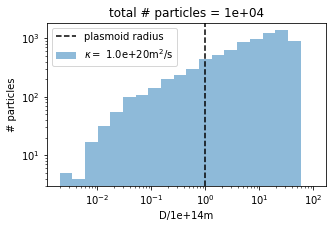

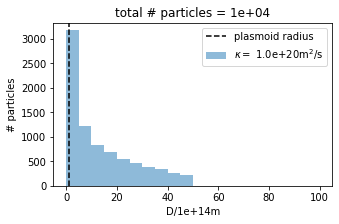

finished:  data/tut_7_2


In [6]:
simulate('data/tut_7_2', 5.0, 20, 40, 100)